In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
orig=pd.read_csv("D://DataScience/Data/airline-passengers.csv")
orig

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [7]:
#Parse strings to date time format
orig['Month']=pd.to_datetime(orig['Month'], infer_datetime_format=True)
orig

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [9]:
# Index as Month
iorig=orig.set_index(['Month'])
iorig.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


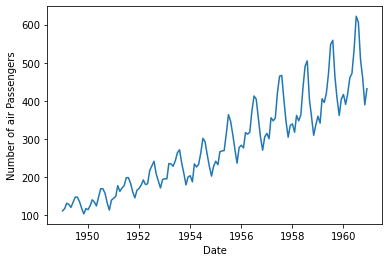

In [10]:
#Plot Graph
plt.xlabel('Date')
plt.ylabel('Number of air Passengers')
plt.plot(iorig)

By seeing the above graph that. there is a trend. But the data is non-stationary.
because the mean at 1952 and 1958 are not same. but the mean is gradually increasing with time
### Lets check the stationary

In [19]:
# Rolling statistics
rolmean=iorig.rolling(window=12).mean()
rolstd=iorig.rolling(window=12).std()
print(rolmean.head(24),'n/',rolstd.head(24))

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01  126.666667
1950-01-01  126.916667
1950-02-01  127.583333
1950-03-01  128.333333
1950-04-01  128.833333
1950-05-01  129.166667
1950-06-01  130.333333
1950-07-01  132.166667
1950-08-01  134.000000
1950-09-01  135.833333
1950-10-01  137.000000
1950-11-01  137.833333
1950-12-01  139.666667 n/             Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   13.720147
1950-01-01   13.453342
1950-02-01   13.166475
1950-03-01   13.686977
1950-04-

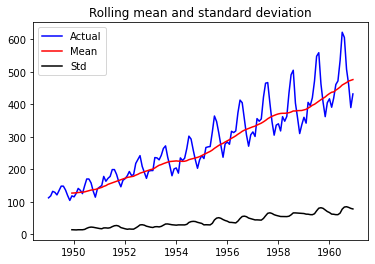

In [23]:
# plot rolling statistics
actual=plt.plot(iorig, color='blue',label='Actual')
mean=plt.plot(rolmean, color='red',label='Mean')
std=plt.plot(rolstd, color='black',label='Std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation')
plt.show()

In [28]:
# perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test')
dftest=adfuller(iorig['Passengers'],autolag='AIC')

dfoutput=pd.Series(dftest[0:4], index=['test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key]= value
    
    print(dfoutput)

Results of Dickey-Fuller Test
test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
dtype: float64
test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
dtype: float64
test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


p value is >0.05, reject null hypothesis (data is not stationary)

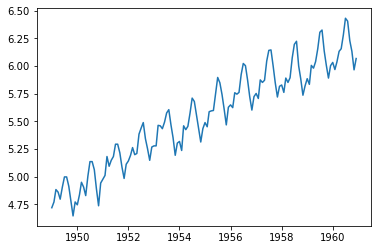

In [29]:
#Estimate Trend
iorig_logScale=np.log(iorig)
plt.plot(iorig_logScale)

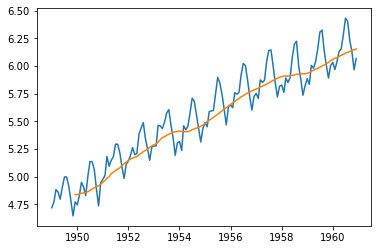

In [31]:
rolmean_log=iorig_logScale.rolling(window=12).mean()
rolstd_log=iorig_logScale.rolling(window=12).std()
plt.plot(iorig_logScale)
plt.plot(rolmean_log)
#plt.plot(rolstd_log)

But the data is non-stationary again

In [36]:
datasetLogscaleMinusMovingAvg=iorig_logScale- rolmean_log
datasetLogscaleMinusMovingAvg.head(12)

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [37]:
# Remove Nan values
datasetLogscaleMinusMovingAvg.dropna(inplace=True)
datasetLogscaleMinusMovingAvg.head(12)

,Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [60]:
# Function to find whether the data set is stationary or not
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determining rolling statistics
    movingAVG=timeseries.rolling(window=12).mean()
    movingSTD=timeseries.rolling(window=12).std()
    
    #Plot Rolling statistics
    actual=plt.plot(timeseries, color='blue',label='Actual')
    mean=plt.plot(movingAVG, color='red',label='Mean')
    std=plt.plot(movingSTD, color='black',label='Std')
    plt.legend(loc='best')
    plt.title('Rolling mean and standard deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    dftest=adfuller(timeseries['Passengers'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key]= value
        print(dfoutput)


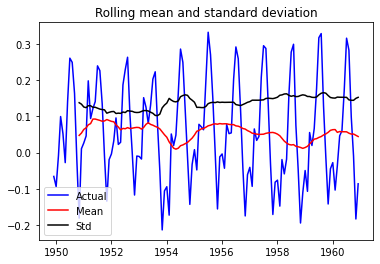

Results of Dickey-Fuller Test
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
dtype: float64
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
dtype: float64
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [46]:
# Run the function
test_stationarity(datasetLogscaleMinusMovingAvg)

p value is <0.05, Accept null hypothesis (data is stationary now)

### Exponential

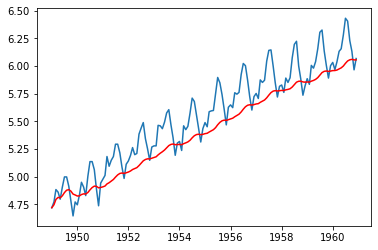

In [48]:
exponentialDecayWeightedAvg=iorig_logScale.ewm(halflife=12, min_periods=0,
                                               adjust=True).mean()
plt.plot(iorig_logScale)
plt.plot(exponentialDecayWeightedAvg,color='red')

### log-weightedavg

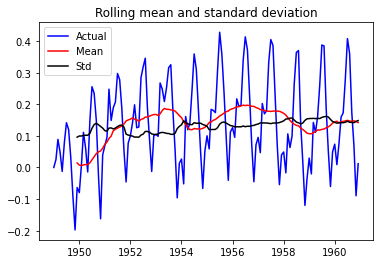

Results of Dickey-Fuller Test
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
dtype: float64
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
dtype: float64
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [49]:
datasetLogscaleMinusMovingAvgExpDecayAvg=iorig_logScale-exponentialDecayWeightedAvg
test_stationarity(datasetLogscaleMinusMovingAvgExpDecayAvg)

### Use function called shift to shift

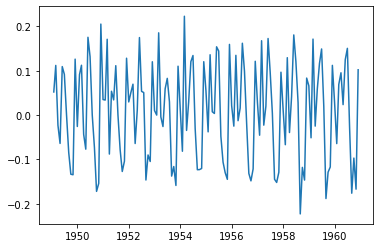

In [50]:
datasetLogDiffShifting=iorig_logScale-iorig_logScale.shift()
plt.plot(datasetLogDiffShifting)

### components of Time series

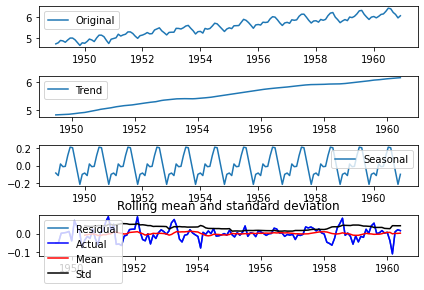

Results of Dickey-Fuller Test


KeyError: 'Passengers'

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(iorig_logScale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(iorig_logScale,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

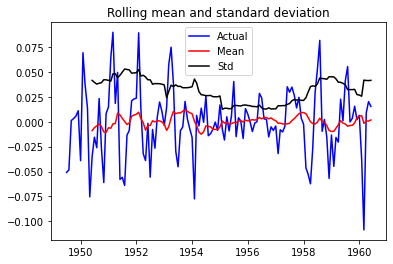

Results of Dickey-Fuller Test


KeyError: 'Passengers'

In [59]:
decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

### calculate ACF and PACF plot

In [61]:
# ACF and PACF plots
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(datasetLogDiffShifting,nlags=20)
lag_pacf=pacf(datasetLogDiffShifting,nlags=20, method='ols')

#plot_ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='---',color='gray')
plt.axhline(y=0,linestyle='---',color='gray')

In [ ]:
https://www.youtube.com/watch?v=e8Yw4alG16Q